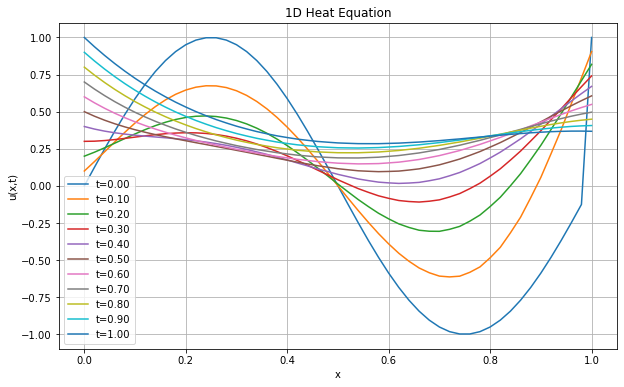

In [7]:
import numpy as np
import matplotlib.pyplot as plt

lenght = 1.0        
time = 1.0       
number_of_points = 50       
number_of_steps = 500 
Dif_coe = 0.1
dx = lenght/ number_of_points    
dt = time / number_of_steps   

r = Dif_coe * dt / dx**2
x = np.linspace(0, lenght, number_of_points+1)
t = np.linspace(0, time, number_of_steps+1)  

u = np.zeros((number_of_points+1, number_of_steps+1))
u[:, 0] = np.sin(2 * np.pi * x)

u[0, :] = t
u[number_of_points, :] = np.exp(-t)

for j in range(number_of_steps):
    for i in range(1, number_of_points):
        u[i, j+1] = r*u[i-1, j] + (1-2*r)*u[i, j] + r*u[i+1, j]

plt.figure(figsize=(10, 6))
for i in range(0, number_of_steps+1, number_of_steps//10):
    plt.plot(x, u[:, i], label=f't={t[i]:.2f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('1D Heat Equation')
plt.legend()
plt.grid(True)
plt.show()


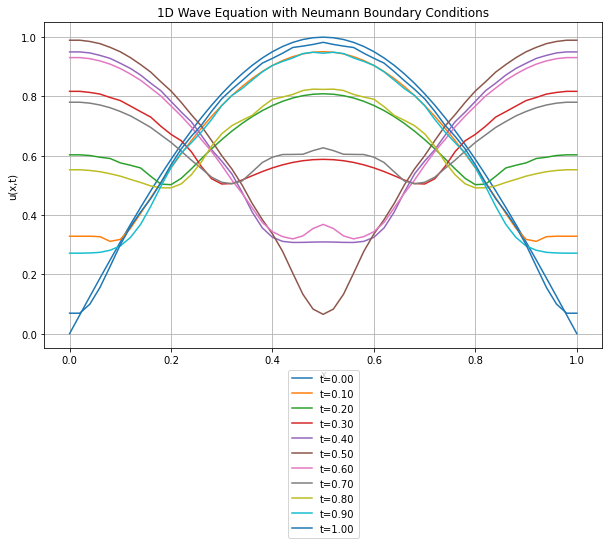

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0         # Length of the string
T = 1.0         # Total time
c = 1.0         # Wave speed
Nx = 50         # Number of spatial points
Nt = 500        # Number of time steps
dx = L / Nx     # Space step
dt = T / Nt     # Time step

# Stability condition
r = (c * dt / dx) ** 2
if r > 1:
    raise ValueError("The scheme is unstable for the given parameters.")

# Discretization
x = np.linspace(0, L, Nx + 1)  # Spatial grid
t = np.linspace(0, T, Nt + 1)  # Time grid

# Initial condition
u = np.zeros((Nx + 1, Nt + 1))
u[:, 0] = np.sin(np.pi * x)

# First time step using the central difference scheme for velocity
for i in range(1, Nx):
    u[i, 1] = u[i, 0] + (r / 2) * (u[i - 1, 0] - 2 * u[i, 0] + u[i + 1, 0])

# Time-stepping loop using central differences in time and space
for j in range(1, Nt):
    for i in range(1, Nx):
        u[i, j + 1] = 2 * (1 - r) * u[i, j] + r * (u[i - 1, j] + u[i + 1, j]) - u[i, j - 1]

    # Neumann boundary conditions
    u[0, j + 1] = u[1, j + 1]  # Reflecting boundary at x=0
    u[Nx, j + 1] = u[Nx - 1, j + 1]  # Reflecting boundary at x=L

# Plotting the result
plt.figure(figsize=(10, 6))
for i in range(0, Nt + 1, Nt // 10):
    plt.plot(x, u[:, i], label=f't={t[i]:.2f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('1D Wave Equation with Neumann Boundary Conditions')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
plt.grid(True)
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt

lenght = 1.0        
time = 1.0       
number_of_points = 50       
number_of_steps = 500 
wave_speed = 1.0
dx = lenght/ number_of_points    
dt = time / number_of_steps

r = wave_speed * dt / dx**2
x = np.linspace(0, lenght, number_of_points+1)
t = np.linspace(0, time, number_of_steps+1) 

u = np.zeros((number_of_points+1, number_of_steps+1))
u[:, 0] = np.sin(np.pi * x)

for i in range(1, number_of_steps):
    u[i, 1] = u[i, 0] + (r / 2) * (u[i - 1, 0] - 2 * u[i, 0] + u[i + 1, 0])

for j in range(1, number_of_points):
    for i in range(1, number_of_steps):
        u[i, j + 1] = 2 * (1 - r) * u[i, j] + r * (u[i - 1, j] + u[i + 1, j]) - u[i, j - 1]

    # Neumann boundary conditions
    u[0, j + 1] = u[1, j + 1]  # Reflecting boundary at x=0
    u[number_of_points, j + 1] = u[number_of_points - 1, j + 1]  # Reflecting boundary at x=L

# Plotting the result
plt.figure(figsize=(10, 6))
for i in range(0, number_of_steps + 1, number_of_steps // 10):
    plt.plot(x, u[:, i], label=f't={t[i]:.2f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('1D Wave Equation with Neumann Boundary Conditions')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
plt.grid(True)
plt.show()

IndexError: index 51 is out of bounds for axis 0 with size 51